In [7]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [2]:
train = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\고객대출등급분류\train.csv')
test = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\고객대출등급분류\test.csv')
submit = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\고객대출등급분류\sample_submission.csv')

train.head(5)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [4]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [5]:
def credits_level_counts(col):
    unique_list = list(train[col].unique())

    for unique in unique_list:
        cond_unique = (train[col] == unique)
        print(unique)
        print(train.loc[cond_unique]['대출등급'].value_counts())
        print()

In [6]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']

C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


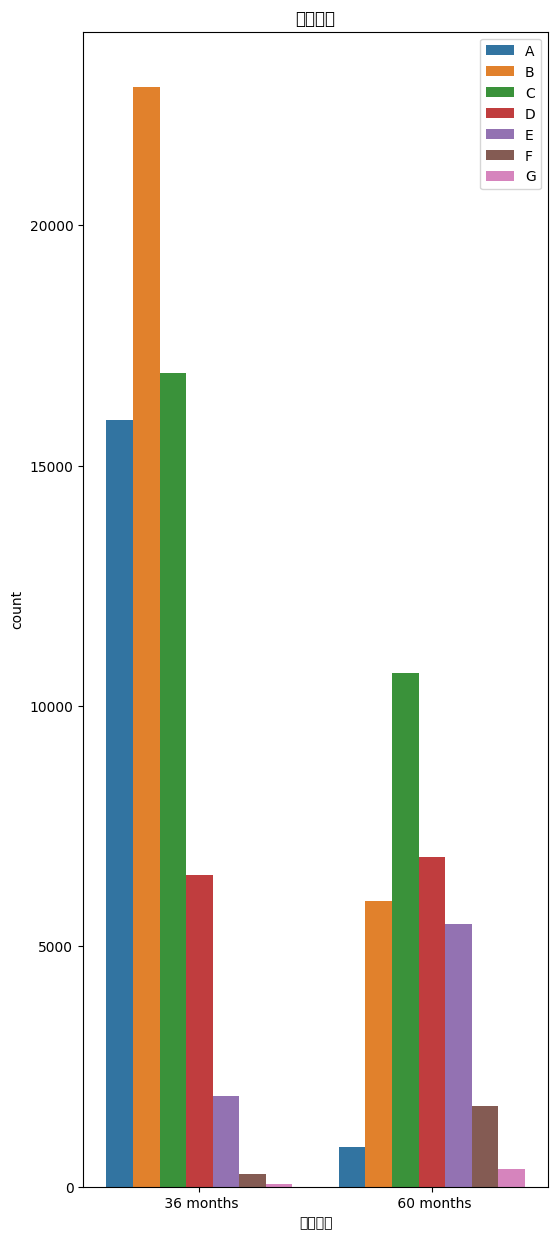


 36 months
대출등급
B    22883
C    16935
A    15952
D     6485
E     1895
F      270
G       59
Name: count, dtype: int64

 60 months
대출등급
C    10688
D     6869
B     5934
E     5459
F     1684
A      820
G      361
Name: count, dtype: int64



C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


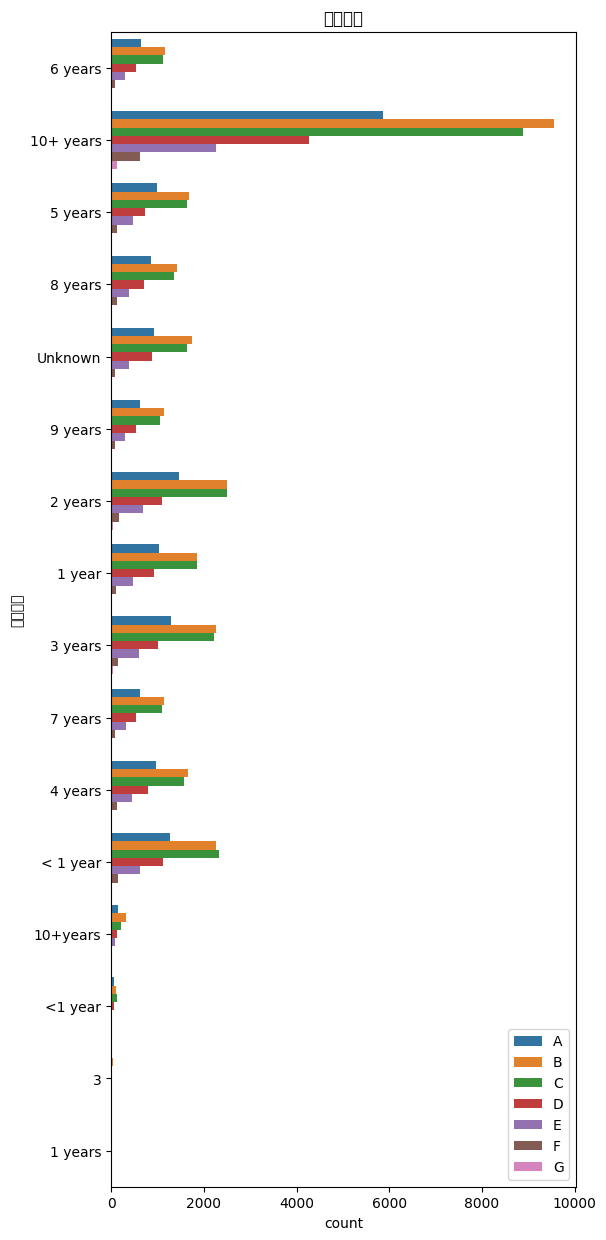


6 years
대출등급
B    1157
C    1124
A     650
D     543
E     296
F      85
G      19
Name: count, dtype: int64

10+ years
대출등급
B    9554
C    8882
A    5872
D    4262
E    2254
F     627
G     134
Name: count, dtype: int64

5 years
대출등급
B    1679
C    1646
A     986
D     736
E     475
F     119
G      24
Name: count, dtype: int64

8 years
대출등급
B    1417
C    1364
A     867
D     707
E     385
F     128
G      20
Name: count, dtype: int64

Unknown
대출등급
B    1742
C    1628
A     934
D     872
E     378
F      92
G      25
Name: count, dtype: int64

9 years
대출등급
B    1137
C    1049
A     621
D     545
E     289
F      85
G      18
Name: count, dtype: int64

2 years
대출등급
C    2495
B    2493
A    1454
D    1107
E     695
F     170
G      36
Name: count, dtype: int64

1 year
대출등급
B    1845
C    1845
A    1025
D     919
E     478
F     109
G      28
Name: count, dtype: int64

3 years
대출등급
B    2270
C    2209
A    1295
D    1015
E     604
F     149
G      39
Name: count, dtype: int64

7 years


C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) 

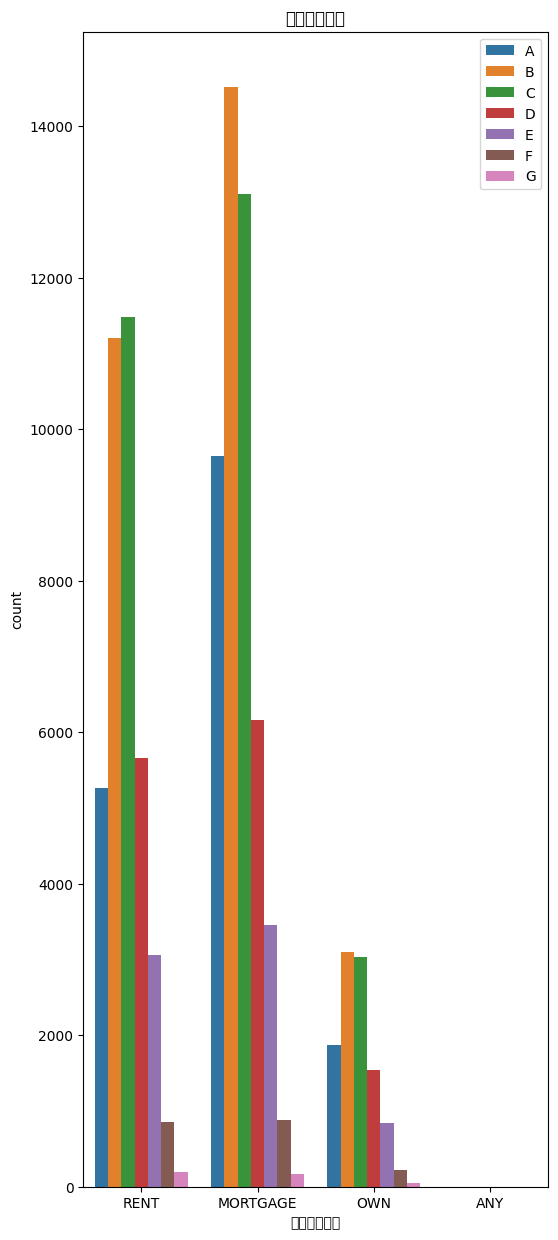


RENT
대출등급
C    11478
B    11200
D     5653
A     5268
E     3056
F      855
G      195
Name: count, dtype: int64

MORTGAGE
대출등급
B    14518
C    13106
A     9640
D     6163
E     3452
F      883
G      172
Name: count, dtype: int64

OWN
대출등급
B    3099
C    3038
A    1864
D    1538
E     846
F     216
G      53
Name: count, dtype: int64

ANY
대출등급
C    1
Name: count, dtype: int64



C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwks\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) 

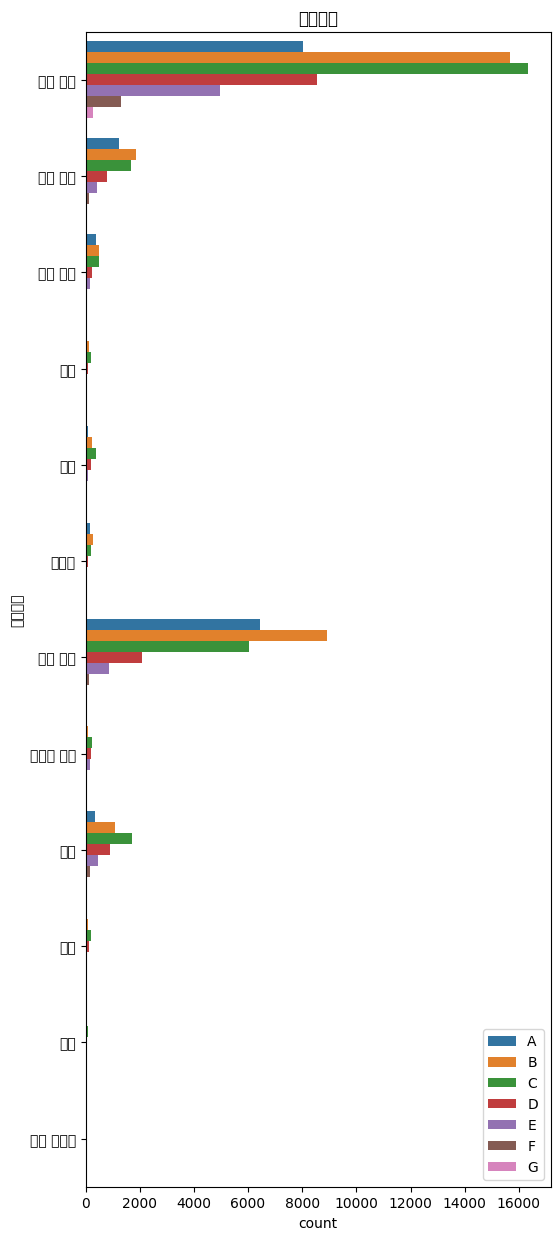


부채 통합
대출등급
C    16349
B    15680
D     8529
A     8036
E     4979
F     1311
G      266
Name: count, dtype: int64

주택 개선
대출등급
B    1845
C    1689
A    1225
D     805
E     425
F     145
G      26
Name: count, dtype: int64

주요 구매
대출등급
C    503
B    479
A    372
D    238
E    150
F     53
G      8
Name: count, dtype: int64

휴가
대출등급
C    196
B    119
D     78
A     40
E     27
F      4
G      2
Name: count, dtype: int64

의료
대출등급
C    375
B    238
D    197
A    104
E     91
F     27
G      7
Name: count, dtype: int64

자동차
대출등급
B    258
C    213
A    174
D     87
E     46
F     15
G      4
Name: count, dtype: int64

신용 카드
대출등급
B    8917
A    6424
C    6036
D    2092
E     877
F     137
G      17
Name: count, dtype: int64

소규모 사업
대출등급
C    249
D    192
E    158
B     75
F     64
G     30
A     19
Name: count, dtype: int64

기타
대출등급
C    1705
B    1080
D     916
E     478
A     356
F     147
G      43
Name: count, dtype: int64

이사
대출등급
C    203
D    131
B     86
E     50
F     18
A     13
G  

In [8]:
for col in list_cat:
    if col in ['근로기간', '대출목적']:
        plt.figure(figsize = (6, 15))
        sns.countplot(data = train, y = col, hue = '대출등급', hue_order = hue_order)
        plt.title(col)
        plt.legend(loc = 'lower right')
        plt.show()
        print()
        credits_level_counts(col = col)
    
    else:
        plt.figure(figsize = (6, 15))
        sns.countplot(data = train, x = col, hue = '대출등급', hue_order = hue_order)
        plt.title(col)
        plt.legend(loc = 'upper right')
        plt.show()
        print()
        credits_level_counts(col = col)